<a href="https://colab.research.google.com/github/Nirmitraj/cs666student/blob/main/CS666_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

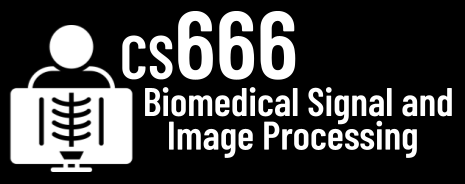

# Assignment 1

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Task 1** (5 pts): Install the BioSPPY library with the following code.

In [2]:
!pip install biosppy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 6.4 MB/s eta 0:00:00


**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset. Note: this might fail with an import error, but should be an easy fix :)

In [6]:
!pip install peakutils
from biosppy import storage
signal, metadata = storage.load_txt('/content/ecg.txt')

**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [10]:
SAMPLING_RATE = 1000
SECONDS = 15.0

**Task 4** (15 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

In [11]:
### TODO
from biosppy.signals import ecg

out = ecg.ecg(
    signal=signal,
    sampling_rate=SAMPLING_RATE,
    show=False
)

filtered = out['filtered']
rpeaks = out['rpeaks']
ts = out['ts']

**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

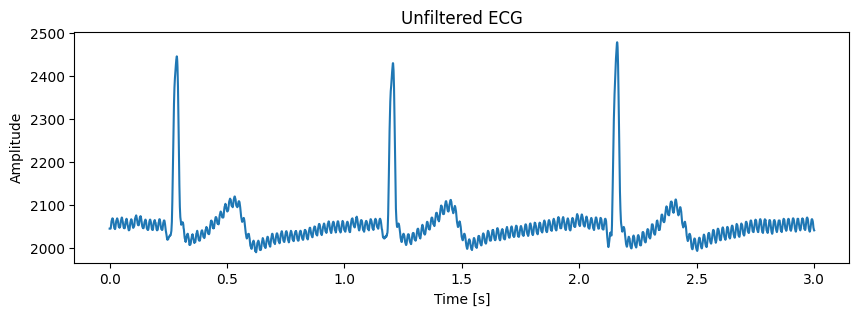

In [16]:
### TODO plot unfiltered signal
import matplotlib.pyplot as plt

mask = ts <= 3.0

plt.figure(figsize=(10, 3))
plt.plot(ts[mask], signal[mask])
plt.title("Unfiltered ECG")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

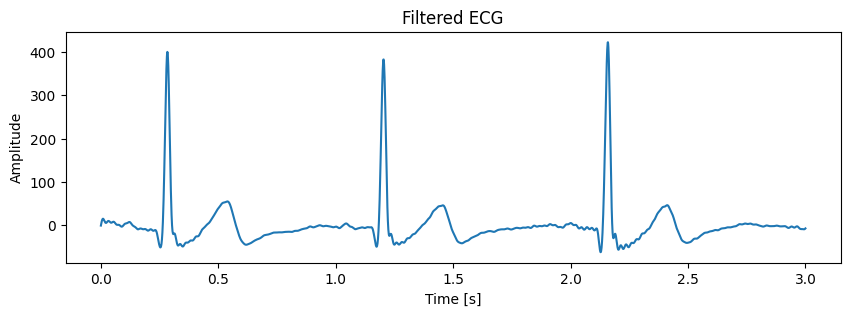

In [17]:
### TODO plot filtered signal
plt.figure(figsize=(10, 3))
plt.plot(ts[mask], filtered[mask])
plt.title("Filtered ECG")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

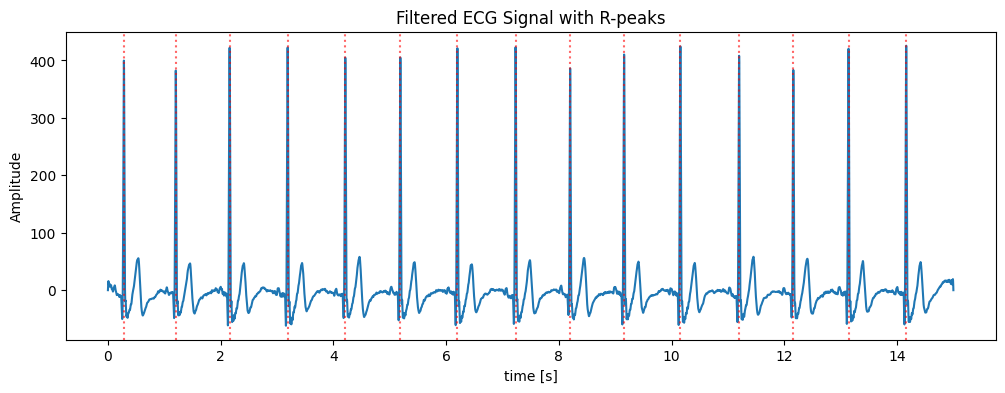

In [18]:
### TODO
plt.figure(figsize=(12, 4))

plt.plot(ts, filtered, label="Filtered ECG")

for rp in rpeaks:
    plt.axvline(
        x=ts[rp],
        color='r',
        linestyle=':',
        alpha=0.6
    )

plt.xlabel('time [s]')
plt.ylabel('Amplitude')
plt.title('Filtered ECG Signal with R-peaks')
plt.show()

**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [19]:
!pip install neurokit2
import neurokit2 as nk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 708.4/708.4 kB 15.6 MB/s eta 0:00:00


**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

P peaks: [nan, np.int64(1052), np.int64(1991), np.int64(3030), np.int64(4051), np.int64(5031), np.int64(6030), np.int64(7069), np.int64(8031), np.int64(8990), np.int64(9989), np.int64(11029), np.int64(11990), np.int64(12969), np.int64(14007)]
Q peaks: [nan, np.int64(1169), np.int64(2124), np.int64(3158), np.int64(4180), np.int64(5158), np.int64(6163), np.int64(7200), np.int64(8164), np.int64(9122), np.int64(10121), np.int64(11162), np.int64(12123), np.int64(13103), np.int64(14133)]
S peaks: [np.int64(340), np.int64(1262), np.int64(2221), np.int64(3241), np.int64(4262), np.int64(5259), np.int64(6260), np.int64(7300), np.int64(8261), np.int64(9219), np.int64(10200), np.int64(11259), np.int64(12220), np.int64(13199), np.int64(14218)]
T peaks: [np.int64(532), np.int64(1452), np.int64(2410), np.int64(3429), np.int64(4453), np.int64(5431), np.int64(6449), np.int64(7470), np.int64(8451), np.int64(9410), np.int64(10409), np.int64(11449), np.int64(12409), np.int64(13387), np.int64(14409)]


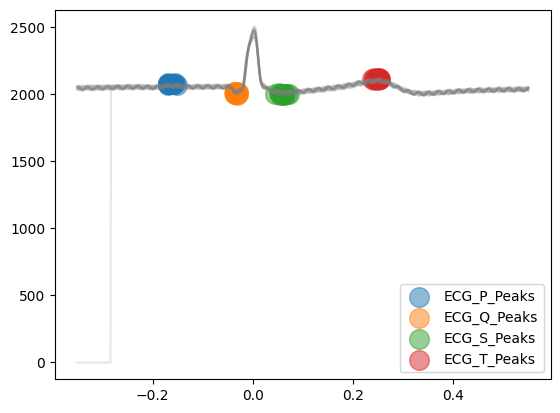

In [24]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the unfiltred signal?
# Hint: Look at the tutorial: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Hint 3: rpeaks were detected above from biosppy's ecg.ecg method
import neurokit2 as nk
import numpy as np

rpeaks_nk = {"ECG_R_Peaks": np.array(rpeaks, dtype=int)}

signals_d, waves = nk.ecg_delineate(
    ecg_cleaned=signal,
    rpeaks=rpeaks_nk,
    sampling_rate=SAMPLING_RATE,
    method="peak",
    show=True,
    show_type="peaks"
)

print("P peaks:", waves.get("ECG_P_Peaks"))
print("Q peaks:", waves.get("ECG_Q_Peaks"))
print("S peaks:", waves.get("ECG_S_Peaks"))
print("T peaks:", waves.get("ECG_T_Peaks"))

# TODO Does the detection work well?
The detection works well for QRS complexes, with Q and S peaks accurately identified, and T waves reasonably placed; P wave detection
is less precise due to its low amplitude and the use of the unfiltered ECG signal.

**Task 9** (10 pts): Use the sleepecg library to find the R Peaks.

In [29]:
# We have the R spikes/peaks now from Biosppy from above but there is another
# library called sleepecg.
# TODO Please install it and run the rpeak detection!
# Docs: https://sleepecg.readthedocs.io/en/stable/
!pip install sleepecg

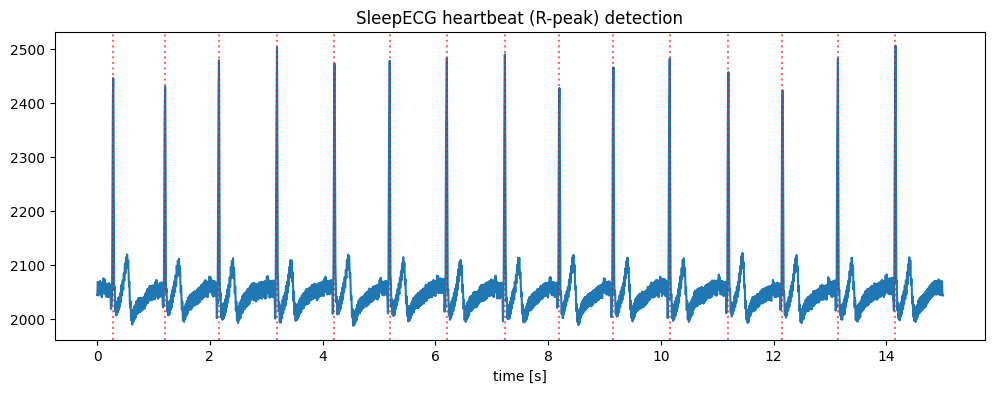

In [33]:
import sleepecg
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(len(signal)) / SAMPLING_RATE

plt.figure(figsize=(12,4))
plt.plot(t, signal, label="Raw ECG")

for b in beats:
    plt.axvline(x=t[b], color='r', ls=':', alpha=0.6)

plt.xlabel("time [s]")
plt.title("SleepECG heartbeat (R-peak) detection")
plt.show()

In [54]:
# TODO Do Biosppy and sleepecg give different rpeaks? Please calculate the MSE!
from scipy.spatial.distance import cdist
# From BioSPPy
rpeaks_biosppy = np.array(rpeaks)

rpeaks_sleepecg = np.array(beats)

b = rpeaks_biosppy.reshape(-1, 1)
s = rpeaks_sleepecg.reshape(-1, 1)

dist_matrix = cdist(b, s)

closest_s_idx = np.argmin(dist_matrix, axis=1)

matched_sleepecg = rpeaks_sleepecg[closest_s_idx]

In [55]:
mse = np.mean((rpeaks_biosppy - matched_sleepecg) ** 2)
print("MSE between BioSPPy and SleepECG R-peaks:", mse)

MSE between BioSPPy and SleepECG R-peaks: 0.2


The very low MSE (0.2) shows that BioSPPy and SleepECG detect R-peaks at nearly the same locations, with minimal differences

**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

RAW delineation:
P: [nan, 1051, 1991, 3029, 4050, 5030, 6030, 7068, 8030, 9008, 9989, 11029, 11989, 12969, 14007]
Q: [nan, np.int64(1169), np.int64(2124), np.int64(3158), np.int64(4180), np.int64(5158), np.int64(6163), np.int64(7200), np.int64(8164), np.int64(9122), np.int64(10121), np.int64(11162), np.int64(12123), np.int64(13103), np.int64(14133)]
S: [np.int64(340), np.int64(1262), np.int64(2221), np.int64(3241), np.int64(4262), np.int64(5259), np.int64(6260), np.int64(7300), np.int64(8261), np.int64(9219), np.int64(10200), np.int64(11259), np.int64(12220), np.int64(13199), np.int64(14218)]
T: [530, 1447, 2404, 3437, 4457, 5432, 6446, 7480, 8444, 9406, 10404, 11446, 12403, 13388, 14412]


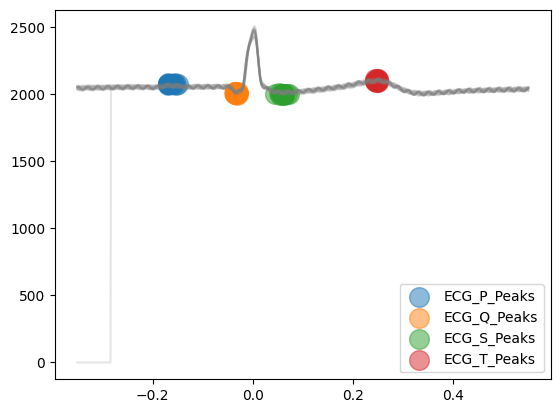

In [57]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
rpeaks_nk = {"ECG_R_Peaks": np.array(rpeaks, dtype=int)}

signals_raw, waves_raw = nk.ecg_delineate(
    ecg_cleaned=signal,           # raw/unfiltered
    rpeaks=rpeaks_nk,
    sampling_rate=SAMPLING_RATE,
    method="dwt",
    show=True,
    show_type="peaks"
)

print("RAW delineation:")
print("P:", waves_raw.get("ECG_P_Peaks"))
print("Q:", waves_raw.get("ECG_Q_Peaks"))
print("S:", waves_raw.get("ECG_S_Peaks"))
print("T:", waves_raw.get("ECG_T_Peaks"))

Bandpass delineation (lowcut=0.5, highcut=40):
P: [nan, 1047, 1993, 3027, 4049, 5029, 6032, 7068, 8036, 8990, 9988, 11029, 11990, 12971, 14004]
Q: [np.int64(255), np.int64(1175), np.int64(2129), np.int64(3159), np.int64(4182), np.int64(5159), np.int64(6171), np.int64(7202), np.int64(8172), np.int64(9128), np.int64(10126), np.int64(11169), np.int64(12131), np.int64(13110), np.int64(14133)]
S: [np.int64(342), np.int64(1261), np.int64(2219), np.int64(3241), np.int64(4263), np.int64(5240), np.int64(6257), np.int64(7282), np.int64(8260), np.int64(9219), np.int64(10219), np.int64(11257), np.int64(12218), np.int64(13217), np.int64(14217)]
T: [530, 1446, 2404, 3437, 4457, 5432, 6446, 7480, 8443, 9405, 10403, 11446, 12403, 13388, 14412]


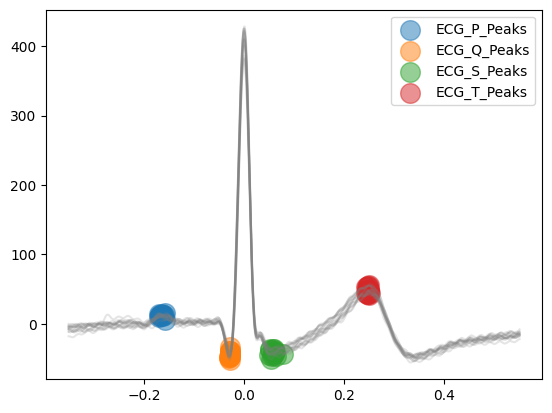

In [58]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass.
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.
# Reuse BioSPPy rpeaks
rpeaks_nk = {"ECG_R_Peaks": np.array(rpeaks, dtype=int)}

LOWCUT = 0.5
HIGHCUT = 40

# 0.5 and 40 works the best

signal_bp = nk.signal_filter(
    signal,
    sampling_rate=SAMPLING_RATE,
    lowcut=LOWCUT,
    highcut=HIGHCUT,
    method="butterworth",
    order=4
)

signals_bp, waves_bp = nk.ecg_delineate(
    ecg_cleaned=signal_bp,
    rpeaks=rpeaks_nk,
    sampling_rate=SAMPLING_RATE,
    method="dwt",
    show=True,
    show_type="peaks"
)

print("Bandpass delineation (lowcut={}, highcut={}):".format(LOWCUT, HIGHCUT))
print("P:", waves_bp.get("ECG_P_Peaks"))
print("Q:", waves_bp.get("ECG_Q_Peaks"))
print("S:", waves_bp.get("ECG_S_Peaks"))
print("T:", waves_bp.get("ECG_T_Peaks"))

BioSPPy-filtered delineation:
P: [nan, 1043, 1999, 3022, 3848, 5026, 6040, 7067, 8039, 8998, 9981, 11027, 11991, 12975, 14001]
Q: [np.int64(253), np.int64(1174), np.int64(2128), np.int64(3158), np.int64(4181), np.int64(5158), np.int64(6169), np.int64(7201), np.int64(8170), np.int64(9127), np.int64(10125), np.int64(11168), np.int64(12129), np.int64(13109), np.int64(14132)]
S: [np.int64(349), np.int64(1250), np.int64(2204), np.int64(3254), np.int64(4276), np.int64(5254), np.int64(6245), np.int64(7297), np.int64(8265), np.int64(9224), np.int64(10222), np.int64(11262), np.int64(12225), np.int64(13184), np.int64(14208)]
T: [532, 1448, 2405, 3439, 4459, 5433, 6448, 7481, 8445, 9407, 10405, 11447, 12404, 13390, 14413]


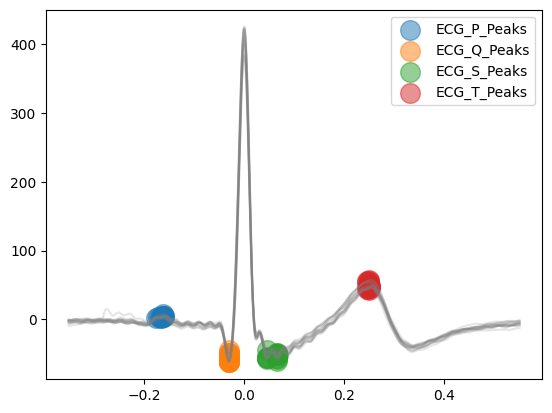

In [59]:
# Finally, run the delineation on the filtered signal from BioSPPY.
rpeaks_nk = {"ECG_R_Peaks": np.array(rpeaks, dtype=int)}

signals_biosppy_filt, waves_biosppy_filt = nk.ecg_delineate(
    ecg_cleaned=filtered,          # BioSPPy filtered signal
    rpeaks=rpeaks_nk,
    sampling_rate=SAMPLING_RATE,
    method="dwt",
    show=True,
    show_type="peaks"
)

print("BioSPPy-filtered delineation:")
print("P:", waves_biosppy_filt.get("ECG_P_Peaks"))
print("Q:", waves_biosppy_filt.get("ECG_Q_Peaks"))
print("S:", waves_biosppy_filt.get("ECG_S_Peaks"))
print("T:", waves_biosppy_filt.get("ECG_T_Peaks"))

# TODO Which one works the best?
The NeuroKit band-pass filtered signal (0.5–40 Hz) works the best overall for P–Q–S–T detection.
Most consistent
Best visual alignment of all waves

In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#